In [1]:
# Module: python3/3.11.7 
# Environment base: /g/data/xe2/datasets/Environments/paddockenv3_11
# Not using geospatenv because it doesn't have pysheds installed

In [2]:
# Standard library
import os
import pickle

# Dependencies
import numpy as np
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
from matplotlib import colors

# Local imports
os.chdir(os.path.join(os.path.expanduser('~'), "Projects/PaddockTS"))
from DAESIM_preprocess.util import gdata_dir, scratch_dir, visualise_tif_rioxarray, plot_time_series, plot_time_point, plot_categorical
from DAESIM_preprocess.topography import show_acc, show_aspect, show_slope, show_ridge_gullies, pysheds_accumulation, catchment_gullies, catchment_ridges, calculate_slope
from DAESIM_preprocess.canopy_height import visualise_canopy_height
from DAESIM_preprocess.sentinel import available_imagery_sentinel, calendar_plot_sentinel, time_lapse
from DAESIM_preprocess.slga_soils import visualise_soil_texture, visualise_soil_pH
from DAESIM_preprocess.silo_daily import merge_ozwald_silo, resample_weekly, visualise_water, visualise_temp

In [3]:
stubs = {
    "MULL": "Mulloon",
    "CRGM": "Craig Moritz Farm",
    "MILG": "Milgadara",
    "ARBO": "Arboreturm",
    "KOWN": "Kowen Forest",
    "ADAM": "Canowindra"
}

In [4]:
# Filepaths
outdir = os.path.join(gdata_dir, "Data/PadSeg/")
visuals_dir = os.path.join(scratch_dir, "Visuals")
stub = "MULL"

Saved: /scratch/xe2/cb8590/Visuals/MULL_ridge_gullies.png


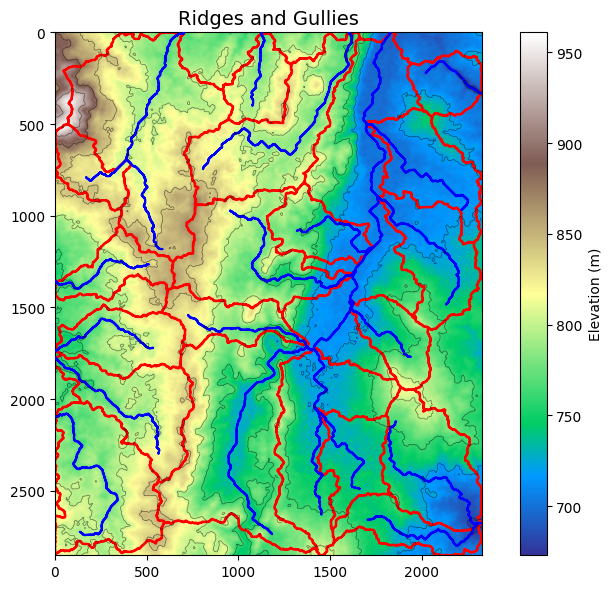

Saved: /scratch/xe2/cb8590/Visuals/MULL_topographic_index.png


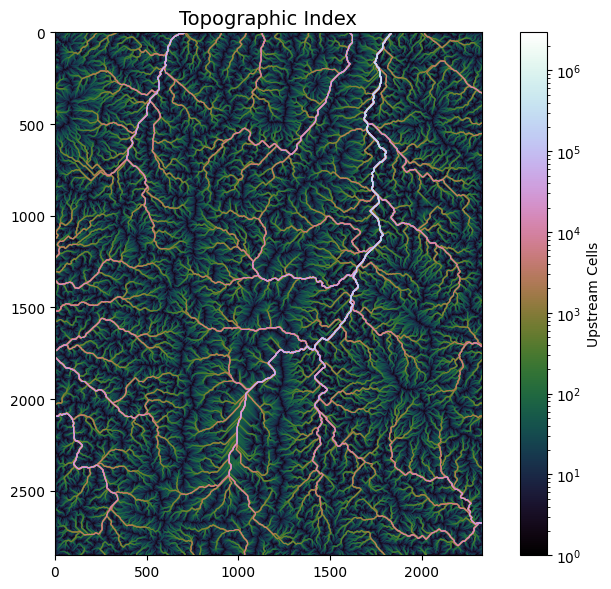

Saved /scratch/xe2/cb8590/Visuals/MULL_aspect.png


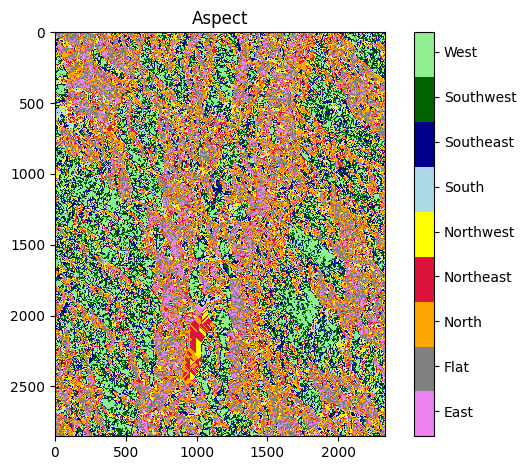

Saved: /scratch/xe2/cb8590/Visuals/MULL_slope.png


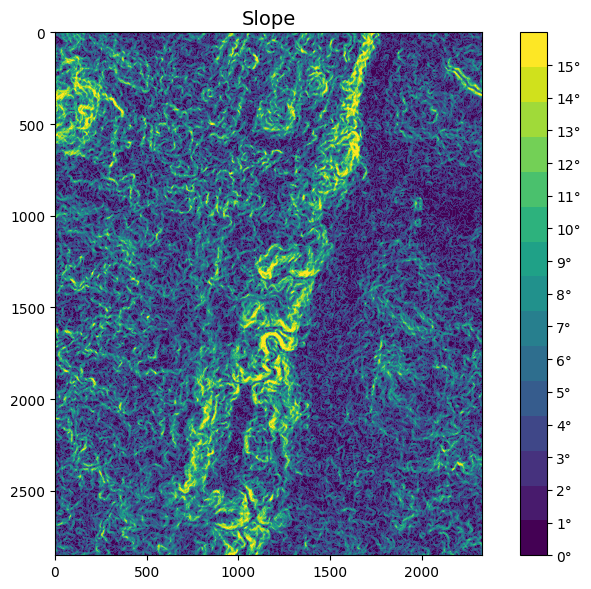

NameError: name 'image' is not defined

In [5]:
%%time
# Terrain visuals

filename = os.path.join(outdir, f"{stub}_terrain.tif")
grid, dem, fdir, acc = pysheds_accumulation(filename)
num_catchments = 20
gullies, full_branches = catchment_gullies(grid, fdir, acc, num_catchments)
ridges = catchment_ridges(grid, fdir, acc, full_branches)
slope = calculate_slope(filename)

show_ridge_gullies(dem, ridges, gullies, visuals_dir, stub)

show_acc(acc, visuals_dir, stub)

show_aspect(fdir, visuals_dir, stub)

show_slope(slope, visuals_dir, stub) 

visualise_canopy_height(filename, visuals_dir, stub)

visualise_soil_texture(outdir, visuals_dir, stub)

visualise_soil_pH(outdir, visuals_dir, stub)

In [6]:
%%time
# Climate visuals

filename_ozwald = os.path.join(outdir, f"{stub}_ozwald_8day.nc")
filename_silo = os.path.join(outdir, f"{stub}_silo_daily.nc")
ds_ozwald = xr.open_dataset(filename_ozwald)
ds_silo = xr.open_dataset(filename_silo)
df = merge_ozwald_silo(ds_ozwald, ds_silo)
df_weekly = resample_weekly(df)

visualise_water(df_weekly)

visualise_temp(df_weekly)

NameError: name 'np' is not defined

Saved: /scratch/xe2/cb8590/Visuals/MULL_available_imagery_sentinel.png
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/g/data/xe2/datasets/Environments/paddockenv3_11/lib/python3.11/site-packages/xarray/core/dataset.py", line 1445, in _construct_dataarray
    variable = self._variables[name]
               ~~~~~~~~~~~~~~~^^^^^^
KeyError: '/'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/g/data/xe2/datasets/Environments/paddockenv3_11/lib/python3.11/site-packages/xarray/core/dataset.py", line 1546, in __getitem__
    return self._construct_dataarray(key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/g/data/xe2/datasets/Environments/paddockenv3_11/lib/python3.11/site-packages/xarray/core/dataset.py", line 1447, in _construct_dataarray
    _, name, variable = _get_virtual_variable(self._variables, name, self.sizes)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/g/data/xe2/datasets/Environments/paddockenv3_11/lib/python3.11/site-packages/xarray/core

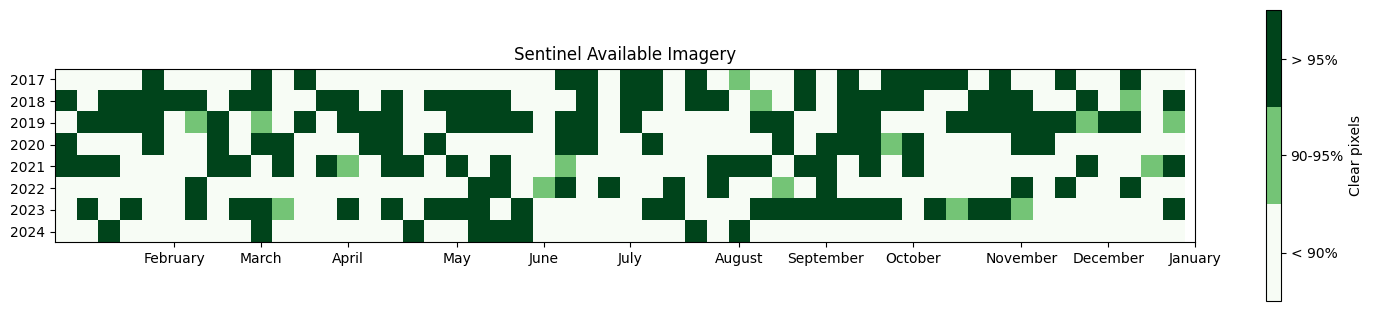

In [7]:
%%time
# Sentinel imagery

filename = os.path.join(outdir, f"{stub}_ds2.pkl")
with open(filename, 'rb') as file:
    ds = pickle.load(file)

available_imagery_sentinel(ds, visuals_dir, stub)

calendar_plot_sentinel(ds, 1, visuals_dir, stub)    # Thumbnail

calendar_plot_sentinel(ds, 5, visuals_dir, stub)    # Detailed

time_lapse(ds, visuals_dir, stub)